Yiğithan Kardaş<br>
201101003<br>
y.kardas@etu.edu.tr

<div style="display: flex; justify-content: center;">
  <h1><b>YAP 470 Proje</b></h1>
</div>

Veri setine göre eğitilecek olan modelin, öğrencilerin başarısını tahmin etmesi beklenen bir Makine Öğrenmesi projesidir.

<div style="display: flex; justify-content: center;">
  <h1>Exploratory Data Analysis</h1>
</div>

Gerekli kütüphaneleri *import* edelim.

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Eğitim verisini dosyadan okuyoruz ve *DataFrame*'e çeviriyoruz.

In [385]:
df = pd.read_csv('./train.csv')

Veri setinde __234__ satır ve __33__ sütun var.

In [386]:
df.shape

(234, 33)

Veri setinde görüldüğü üzere sadece sayısal değerler yok, *string* tipinde değerler de var.

In [387]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Bunu, sütun tiplerine bakarak da doğruluyoruz.

In [388]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Bizim bu veri setinde amacımız, __G3__ hariç geri kalan 32 sütunla modeli eğitip test verilerinde __G3__ değerini tahmin etmek.

Veri setindeki sütunların açıklamarı şunlardır:<br>
- __school__: Öğrencinin okulu
    - __GP__: Gabriel Pereira
    - __MS__: Mousinho da Silveira
- __sex__: Öğrencinin cinsiyeti
    - __F__: Kadın
    - __M__: Erkek
- __age__: Öğrencinin yaşı
- __address__: Öğrencinin adresi
    - __U__: Urban(Kent)
    - __R__: Rural(Kırsal)
- __famsize__: Öğrencinin aile büyüklüğü
    - __GT3__: 3'ten fazla
    - __LE3__: 3'ten az
- __Pstatus__: Ebeveynlerin birlikte yaşama durumu
    - __A__: Ayrı
    - __T__: Birlikte
- __Medu__: Annenin öğrenim durumu
    - __0__: Yok
    - __1__: İlköğretim (4. sınıfa kadar)
    - __2__: 5 - 9. sınıf arası
    - __3__: Ortaöğretim
    - __4__: Yükseköğretim
- __Fedu__: Babanın öğrenim durumu
    - __0__: Yok
    - __1__: İlköğretim (4. sınıfa kadar)
    - __2__: 5 - 9. sınıf arası
    - __3__: Ortaöğretim
    - __4__: Yükseköğretim
- __Mjob__: Annenin mesleği
    - __at_home__: Çalışmıyor
    - __health__: Sağlık sektörü
    - __services__: Kamu hizmetleri
    - __teacher__: Öğretmen
    - __other__: Diğer
- __Fjob__: Babanın mesleği
    - __at_home__: Çalışmıyor
    - __health__: Sağlık sektörü
    - __services__: Kamu hizmetleri
    - __teacher__: Öğretmen
    - __other__: Diğer
- __reason__: Bu okulu tercih etme sebebi
    - __course__: Kurs tercihi
    - __home__: Eve yakınlık
    - __reputation__: Okulun itibarı/ünü
    - __other__: Diğer
- __guardian__: Öğrencinin velisi
    - __mother__: Anne
    - __father__: Baba
    - __other__: Diğer
- __traveltime__: Evden okula gelme süresi
    - __1__: 15 dakikadan az
    - __2__: 15 - 30 dakika arası
    - __3__: 30 - 60 dakika arası
    - __4__: 1 saatten fazla
- __studytime__: Öğrencinin haftalık çalışma saati
    - __1__: 2 saatten az
    - __2__: 2 - 5 saat arası
    - __3__: 5 - 10 saat arası
    - __4__: 10 saatten fazla
- __failures__: Geçmişte başarısız olunan ders sayısı
    - __0__: 0
    - __1__: 1
    - __2__: 2
    - __3__: 3
- __schoolsup__: Ekstra öğrenim desteği
    - __yes__: Var
    - __no__: Yok
- __famsup__: Ailenin öğrenim desteği
    - __yes__: Var
    - __no__: Yok
- __paid__: Ders konusu dahilinde ekstra ücretli dersler (Matematik veya Portekizce)
    - __yes__: Var
    - __no__: Yok
- __activities__: Müfredat dışı etkinlikler
    - __yes__: Var
    - __no__: Yok
- __nursery__: Öğrenci anaokuluna gitti mi?
    - __yes__: Evet
    - __no__: Hayır
- __higher__: Öğrenci yükseköğrenim görmek istiyor mu?
    - __yes__: Evet
    - __no__: Hayır
- __internet__: Öğrencinin evde internet erişimi var mı?
    - __yes__: Evet
    - __no__: Hayır
- __romantic__: Öğrencinin romantik ilişkisi var mı?
    - __yes__: vVar
    - __no__: Yok
- __famrel__: Öğrencinin ailesiyle ilişkisinin kalitesi
    - __1__: Çok kötü
    - __2__: Kötü
    - __3__: Normal
    - __4__: İyi
    - __5__: Çok iyi
- __freetime__: Öğrencinin okuldan sonra boş zamanı
    - __1__: Çok az
    - __2__: Az
    - __3__: Normal
    - __4__: Fazla
    - __5__: Çok fazla
- __goout__: Öğrencinin arkadaşlarıyla dışarı çıkma sıklığı
    - __1__: Çok az
    - __2__: Az
    - __3__: Normal
    - __4__: Fazla
    - __5__: Çok fazla
- __Dalc__: Öğrencinin hafta içi alkol tüketimi
    - __1__: Çok az
    - __2__: Az
    - __3__: Normal
    - __4__: Fazla
    - __5__: Çok fazla
- __Walc__: Öğrencinin hafta sonu alkol tüketimi
    - __1__: Çok az
    - __2__: Az
    - __3__: Normal
    - __4__: Fazla
    - __5__: Çok fazla
- __health__: Öğrencinin sağlık durumu
    - __1__: Çok kötü
    - __2__: Kötü
    - __3__: Normal
    - __4__: İyi
    - __5__: Çok iyi
- __absences__: Öğrencinin devamsızlık sayısı
- __G1__: Öğrencinin 1. sınav notu
- __G2__: Öğrencinin 2. sınav notu
- __G3__: Öğrencinin final notu

Tüm *string*'leri sayısal veriye çevirdik. Ayrıca *natural order*'a sahip olmayan verileri de *one-hot* türüne çevirdik.

In [389]:
g1 = df['G1']
g2 = df['G2']
g3 = df['G3']
df = df.drop(labels=['G1', 'G2', 'G3'], axis=1)

In [390]:
df_numeric = pd.get_dummies(df, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'paid'])
df_numeric['G1'] = g1
df_numeric['G2'] = g2
df_numeric['G3'] = g3
df_numeric.head()

,age,traveltime,studytime,failures,Dalc,Walc,absences,school_GP,sex_F,sex_M,...,health_1,health_2,health_3,health_4,health_5,paid_no,paid_yes,G1,G2,G3
0,18,2,2,0,1,1,6,1,1,0,...,0,0,1,0,0,1,0,5,6,6
1,17,1,2,0,1,1,4,1,1,0,...,0,0,1,0,0,1,0,5,5,6
2,15,1,2,3,2,3,10,1,1,0,...,0,0,1,0,0,0,1,7,8,10
3,15,1,3,0,1,1,2,1,1,0,...,0,0,0,0,1,0,1,15,14,15
4,16,1,2,0,1,2,4,1,1,0,...,0,0,0,0,1,0,1,6,10,10


Veri setinde *NaN* veir yok.

In [391]:
df_numeric.isna().sum()

age           0
traveltime    0
studytime     0
failures      0
Dalc          0
             ..
paid_no       0
paid_yes      0
G1            0
G2            0
G3            0
Length: 82, dtype: int64

Veri setinde birbirinin kopyası olan herhangi iki veri yok.

In [392]:
df_numeric.duplicated().sum()

0

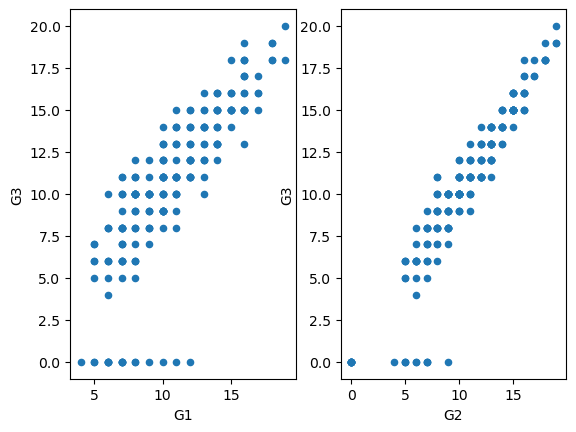

In [393]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df_numeric.plot(kind='scatter', x='G1', y='G3', ax=axes[0])
df_numeric.plot(kind='scatter', x='G2', y='G3', ax=axes[1])
plt.show()

<div style="display: flex; justify-content: center;">
  <h1><b>Modeli Eğitmek</b></h1>
</div>

In [394]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
import sklearn.metrics as sm

In [395]:
dtr = DecisionTreeRegressor(max_depth=5)
rfr = RandomForestRegressor(max_depth=5)
lr = LinearRegression()
ela = ElasticNet()

In [396]:
X_train = df_numeric.values.tolist()
y_train = [];
column_length = len(X_train[0])
for row in X_train:
    y_train.append(int(row[column_length - 1]));
    del row[column_length - 1];

X_train=pd.Series(X_train).tolist();
y_train=pd.Series(y_train).tolist();

In [397]:
df_test = pd.read_csv('./test.csv')
g1_test = df_test['G1']
g2_test = df_test['G2']
g3_test = df_test['G3']
df_test = df_test.drop(labels=['G1', 'G2', 'G3'], axis=1)
df_test = pd.get_dummies(df_test, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'paid'])
df_test['G1'] = g1_test
df_test['G2'] = g2_test
df_test['G3'] = g3_test

In [398]:
X_test = df_test.values.tolist()
y_test = []
for row in X_test:
    y_test.append(int(row[column_length - 1]));
    del row[column_length - 1];

X_test=pd.Series(X_test).tolist();
y_test=pd.Series(y_test).tolist();

In [399]:
dtr.fit(X_train, y_train)
predict = dtr.predict(X_test)
print(sm.r2_score(y_pred=predict, y_true=y_test))

0.6792920392311445


In [400]:
lr.fit(X_train, y_train)
predict2 = lr.predict(X_test)
print(sm.r2_score(y_pred=predict2, y_true=y_test))

-8.740972834957976e+22


In [401]:
rfr.fit(X_train, y_train)
predict = rfr.predict(X_test)
print(sm.r2_score(y_pred=predict, y_true=y_test))

0.7584910645106142


In [402]:
ela.fit(X_train, y_train)
predict = ela.predict(X_test)
print(sm.r2_score(y_pred=predict, y_true=y_test))

0.7236911390023042
